### Text Classification

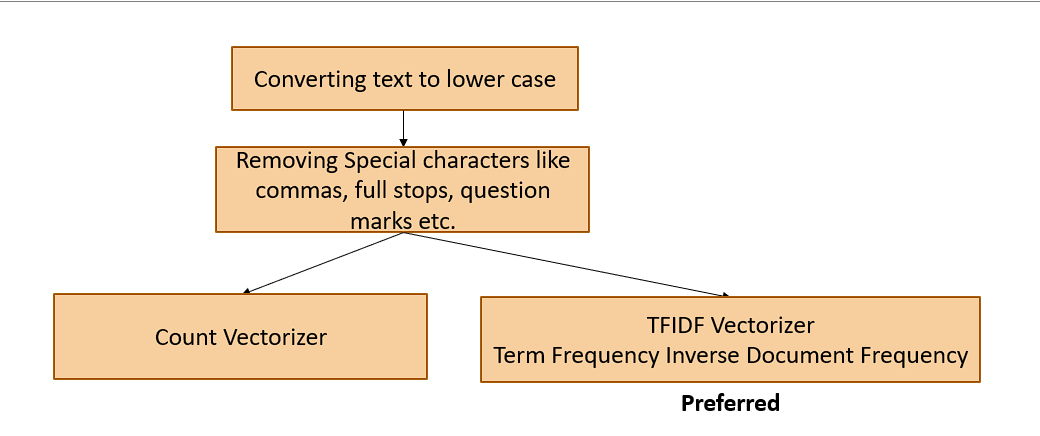

In [37]:
st = 'Hii all ! welcome to text classification'

In [38]:
st = st.lower()
st

'hii all ! welcome to text classification'

In [39]:
import re
st = re.sub("[^a-z0-9 ]","",st)

In [40]:
st

'hii all  welcome to text classification'

In [41]:
def text_preprocessor(st):
    pre = st.lower()
    pre = re.sub("[^a-z0-9 ]","",pre)
    return pre

#### Read the TSV file (Tab separated value)

In [42]:
import pandas as pd
df = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [43]:
df['Review'] = df['Review'].apply(text_preprocessor)

In [44]:
df.head()

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


#### Applay TFIDF Vectorizer on review

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Review']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
Y = df[['Liked']]
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


#### Perform Train test split

In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [49]:
xtrain.shape

(800, 1852)

In [50]:
xtest.shape

(200, 1852)

In [51]:
ytrain.head()

,Liked
29,0
535,1
695,0
557,0
836,1


In [52]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


In [53]:
xtrain.shape[1]

1852

#### Create a neural network

In [54]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping

In [55]:
model = Sequential()

# hidden layer 1
model.add(Dense(256,activation='relu',input_dim=xtrain.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# hidden layer 2
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# output layer
model.add(Dense(1,activation='sigmoid'))

#### Compile the model

In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
early_stop = EarlyStopping(patience=15,monitor='val_loss')

#### Fit the model

In [58]:
hist = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,callbacks=[early_stop])

Epoch 1/100
24/25 [===========================>..] - ETA: 0s - loss: 0.8186 - accuracy: 0.5859

25/25 [==============================] - 8s 63ms/step - loss: 0.8215 - accuracy: 0.5875 - val_loss: 0.6858 - val_accuracy: 0.6000
Epoch 2/100
25/25 [==============================] - 1s 24ms/step - loss: 0.2569 - accuracy: 0.9013 - val_loss: 0.6784 - val_accuracy: 0.5300
Epoch 3/100
25/25 [==============================] - 1s 25ms/step - loss: 0.1207 - accuracy: 0.9663 - val_loss: 0.6696 - val_accuracy: 0.5500
Epoch 4/100
25/25 [==============================] - 1s 24ms/step - loss: 0.0722 - accuracy: 0.9850 - val_loss: 0.6605 - val_accuracy: 0.5650
Epoch 5/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0587 - accuracy: 0.9862 - val_loss: 0.6499 - val_accuracy: 0.6100
Epoch 6/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0297 - accuracy: 0.9962 - val_loss: 0.6396 - val_accuracy: 0.6050
Epoch 7/100
25/25 [==============================] - 1s 25ms/step - loss: 0.0246 - accuracy: 0.9975 - val_loss: 0.6283 - val_accuracy: 0.6300
Epoch 8/100
25/25 

#### Model Evaluation

In [59]:
model.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 0.9975


[0.005845319479703903, 0.9975000023841858]

In [60]:
model.evaluate(xtest,ytest)

1/7 [===>..........................] - ETA: 0s - loss: 1.1821 - accuracy: 0.7500

7/7 [==============================] - 0s 11ms/step - loss: 0.8322 - accuracy: 0.7650


[0.8321639895439148, 0.7649999856948853]

#### Predict the data for train and test

In [61]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

7/7 [==============================] - 0s 5ms/step


In [62]:
yprob_tr[0:5]

array([[3.5354929e-04],
       [9.9982303e-01],
       [5.0372217e-04],
       [2.1334106e-05],
       [9.9963129e-01]], dtype=float32)

In [63]:
yprob_ts[0:5]

array([[0.00409047],
       [0.9969282 ],
       [0.9899064 ],
       [0.99795735],
       [0.90494704]], dtype=float32)

#### Predict the values

In [64]:
ypred_tr = [1 if i>=0.5 else 0 for i in yprob_tr.flatten()]
ypred_ts = [1 if i>=0.5 else 0 for i in yprob_ts.flatten()]

In [65]:
ypred_tr[0:5]

[0, 1, 0, 0, 1]

In [66]:
ytrain.head()

,Liked
29,0
535,1
695,0
557,0
836,1


In [67]:
ypred_ts[0:5]

[0, 1, 1, 1, 1]

In [68]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


#### show the confusion matrics for test

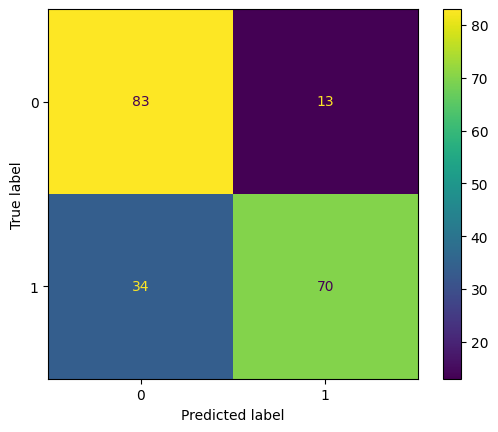

In [69]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

#### Print the Classification report

In [70]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78        96
           1       0.84      0.67      0.75       104

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.76       200
weighted avg       0.78      0.77      0.76       200



#### Save the model for future use

In [71]:
model.save('RestaurantSentiments.keras')

#### Save tfidf as pickel

In [72]:
import pickle
with open('vectorizer.pkl','wb') as file:
    pickle.dump(tfidf,file)